# CO2 Decision Trees (CART) and Information Gain 
## Prepared by: Rob Eugene A. Dequiñon and John Kenneth P. Alon

<b> Problem: </b> Heart disease remains a significant health concern in the Philippines. Early identification of individuals at risk of heart attack can enable timely interventions and lifestyle changes, potentially saving lives. Your task is to build a machine learning model to predict heart attack risk based on several health indicators.



<b> Objectives: </b>

This activity aims to deepen your understanding of the Support Vector Machine (SVM) classification algorithm in a more practical context. You will:

Explore a dataset representing health indicators for individuals and their heart attack risk, understanding its characteristics and the classification challenge.
Implement SVM models using Python's scikit-learn library to predict whether an individual is at 'High Risk' or 'Low Risk' of a heart attack.
Explore different SVM kernel types (Linear, RBF, Polynomial) and adjust their hyperparameters (like C, gamma, and degree) to understand their impact on model performance and decision boundaries.
Evaluate the model's performance using key metrics (accuracy, precision, and recall) to understand its effectiveness in this critical classification task.
Visualize the model's decision boundary (for selected features) to gain intuitive insight into how SVMs make classifications based on health attributes.
Discuss your findings, draw conclusions, and propose recommendations addressing the specific problems and objectives outlined below.


In [10]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("heart_attack_risk_data_ph.csv")
print("First 5 rows of the dataset:")
display(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

First 5 rows of the dataset:


,Age,Cholesterol,SystolicBP,BMI,ExerciseHours,Smoking,Diabetes,HeartAttackRisk
0,52,241.980663,109.872326,18.000000,2.273013,0,0,0
1,42,227.739010,117.832220,20.698075,3.937593,0,0,0
2,54,201.788911,108.113701,22.931972,4.036034,0,0,0
3,67,180.591897,115.380577,34.438438,4.945261,0,0,0
4,41,220.946699,91.595780,27.782766,1.266283,0,1,1



Missing values per column:
Age                0
Cholesterol        0
SystolicBP         0
BMI                0
ExerciseHours      0
Smoking            0
Diabetes           0
HeartAttackRisk    0
dtype: int64


In [11]:
# Separate features and target
X = df.drop("HeartAttackRisk", axis=1)
y = df["HeartAttackRisk"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Define function to train and evaluate SVM
def train_and_evaluate_svm(kernel, C=1.0, gamma='scale', degree=3):
    print(f"\nTraining SVM with {kernel} kernel...")
    model = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"Classification Report ({kernel}):")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {kernel} Kernel')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return model


Training SVM with linear kernel...
Classification Report (linear):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       169
           1       0.68      0.68      0.68        31

    accuracy                           0.90       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.90      0.90      0.90       200

Confusion Matrix:


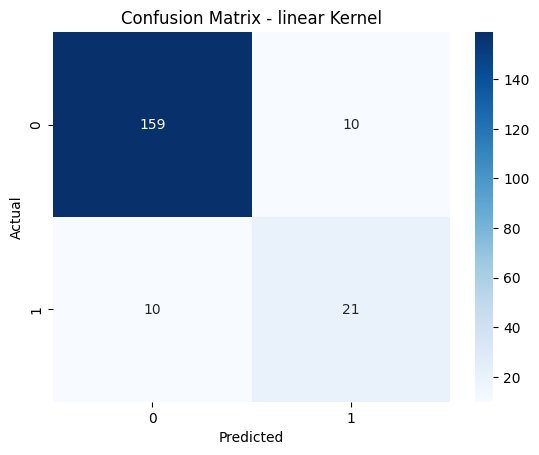

In [13]:
# Train and evaluate Linear SVM
linear_model = train_and_evaluate_svm(kernel="linear", C=1.0)




Training SVM with rbf kernel...
Classification Report (rbf):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       169
           1       0.68      0.68      0.68        31

    accuracy                           0.90       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.90      0.90      0.90       200

Confusion Matrix:


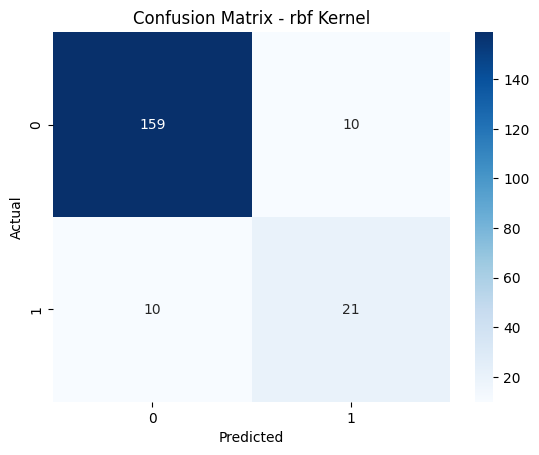

In [14]:
# Train and evaluate RBF SVM
rbf_model = train_and_evaluate_svm(kernel="rbf", C=1.0, gamma=0.1)


Training SVM with poly kernel...
Classification Report (poly):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       169
           1       0.68      0.68      0.68        31

    accuracy                           0.90       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.90      0.90      0.90       200

Confusion Matrix:


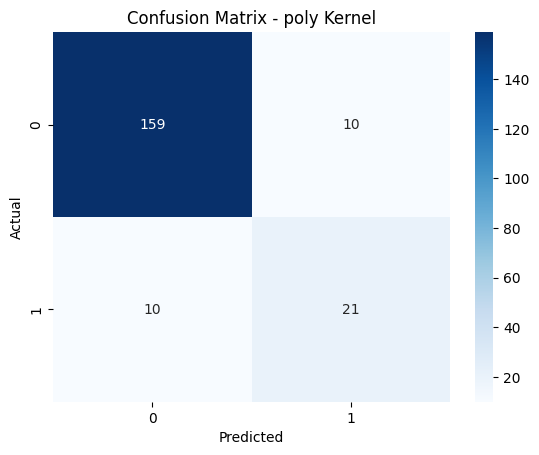

In [15]:
# Train and evaluate Polynomial SVM
poly_model = train_and_evaluate_svm(kernel="poly", C=1.0, degree=3)

In [16]:
# Visualization of decision boundary using PCA (2D)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(*scatter.legend_elements(), title="Risk")
    plt.show()

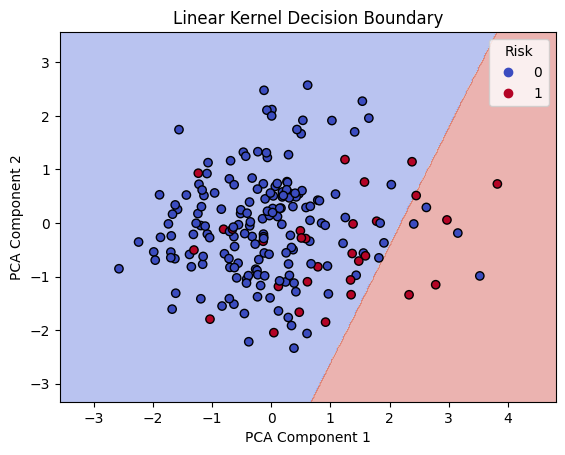

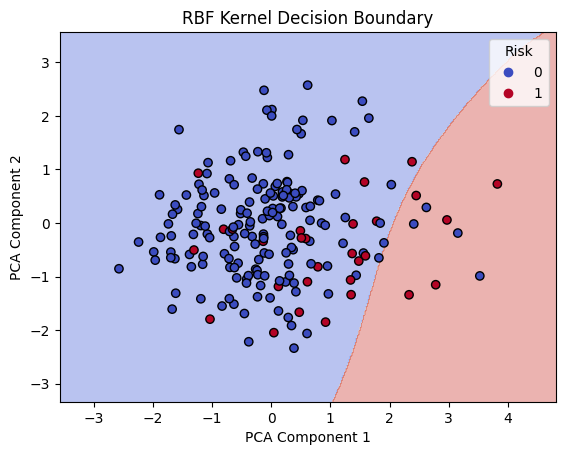

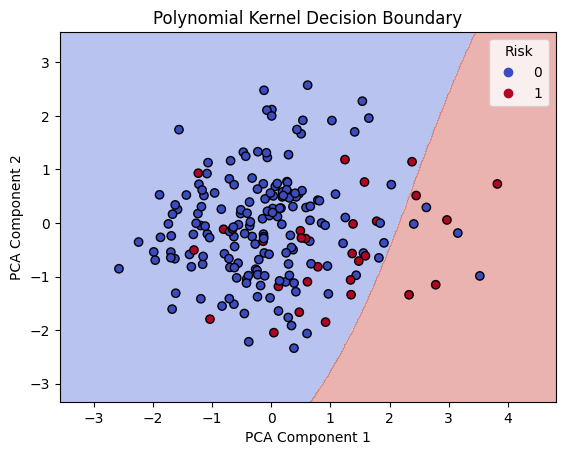

In [17]:
# Retrain models on PCA data for plotting
linear_pca_model = SVC(kernel='linear', C=1.0).fit(X_train_pca, y_train)
plot_decision_boundary(linear_pca_model, X_test_pca, y_test, "Linear Kernel Decision Boundary")

rbf_pca_model = SVC(kernel='rbf', C=1.0, gamma=0.1).fit(X_train_pca, y_train)
plot_decision_boundary(rbf_pca_model, X_test_pca, y_test, "RBF Kernel Decision Boundary")

poly_pca_model = SVC(kernel='poly', C=1.0, degree=3).fit(X_train_pca, y_train)
plot_decision_boundary(poly_pca_model, X_test_pca, y_test, "Polynomial Kernel Decision Boundary")